In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys

%matplotlib inline
plt.style.use('ggplot')

In [73]:
df = pd.read_csv("/Users/ytsegay/git/kaggle_rossman/c2.csv")

In [75]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,assortments:b,assortments:c,storeType:a,storeType:b,storeType:c,storeType:d,stateHolidays:a,stateHolidays:b,stateHolidays:c,stateHolidays:0
0,1,5,5263,555,1,1,1,1270,0,1305,...,0,0,0,0,1,0,0,0,0,1
1,2,5,6064,625,1,1,1,570,0,1295,...,0,0,1,0,0,0,0,0,0,1
2,3,5,8314,821,1,1,1,14130,0,1284,...,0,0,1,0,0,0,0,0,0,1
3,4,5,13995,1498,1,1,1,620,0,1317,...,0,1,0,0,1,0,0,0,0,1
4,5,5,4822,559,1,1,1,29910,0,1384,...,0,0,1,0,0,0,0,0,0,1


In [76]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,assortments:b,assortments:c,storeType:a,storeType:b,storeType:c,storeType:d,stateHolidays:a,stateHolidays:b,stateHolidays:c,stateHolidays:0
count,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,...,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000
mean,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647,5415.979477,-0.317878,894.289411,...,0.008154,0.463494,0.542295,0.015562,0.134525,0.307618,0.019917,0.006577,0.004031,0.969475
std,321.908651,1.997391,3849.926175,464.411734,0.375539,0.485759,0.383056,7710.254532,0.465652,614.039901,...,0.089929,0.498666,0.498208,0.123774,0.341216,0.461508,0.139716,0.080831,0.063359,0.172026
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3727.000000,405.000000,1.000000,0.000000,0.000000,700.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,558.000000,4.000000,5744.000000,609.000000,1.000000,0.000000,0.000000,2320.000000,0.000000,1281.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,838.000000,6.000000,7856.000000,837.000000,1.000000,1.000000,0.000000,6880.000000,0.000000,1343.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000,75860.000000,0.000000,1388.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
dfZeroSales = df[df.Sales == 0]

dfNoZeroSales = df.drop(df[df.Sales <= 0].index)

# all data after may 2015 (including may) is considered for testing
dfTrain = dfNoZeroSales[(dfNoZeroSales.trainYear < 2015)]
dfTest = dfNoZeroSales[((dfNoZeroSales.trainYear >= 2015) & (dfNoZeroSales.trainMonth >= 5))]

yTrain = dfTrain.Sales
yTest = dfTest.Sales

xTrain = dfTrain.drop('Sales', axis=1)
xTest = dfTest.drop('Sales', axis=1)

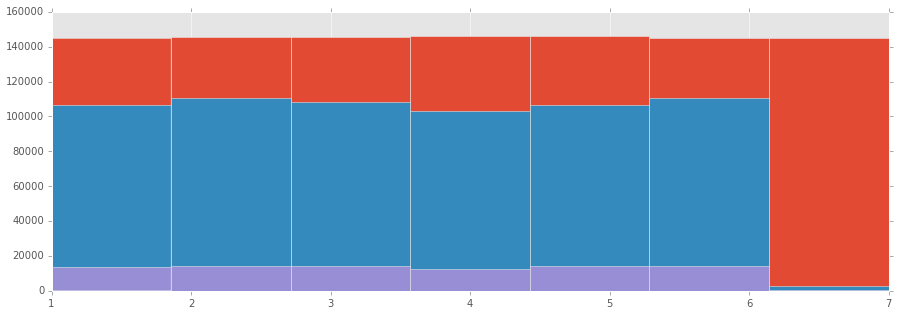

In [78]:
# distribution of sales by day.
# whatever is left of dfTrain+dfTest are the rows where no sales have been made
df.DayOfWeek.hist(bins=7, figsize=(15,5))
dfTrain.DayOfWeek.hist(bins=7, figsize=(15,5))
dfTest.DayOfWeek.hist(bins=7, figsize=(15,5))

In [79]:
# for most days the number of stores 
# which made sales are about the same, except for dat 7
dfTrain.DayOfWeek.value_counts()

2    110840
6    110624
3    108505
1    106327
5    106286
4    102956
7      2771
Name: DayOfWeek, dtype: int64

In [80]:
# zero sales means they are closed except for 54 stores
dfZeroSales.Open.value_counts()

0    172817
1        54
Name: Open, dtype: int64

In [83]:
# which stores are these?
dfZeroSales[dfZeroSales.Open == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,assortments:b,assortments:c,storeType:a,storeType:b,storeType:c,storeType:d,stateHolidays:a,stateHolidays:b,stateHolidays:c,stateHolidays:0
291,292,5,0,0,0,1,1,1100,0,1314,...,0,0,1,0,0,0,0,0,0,1
875,876,5,0,0,0,1,1,21790,0,1264,...,0,0,1,0,0,0,0,0,0,1
1406,292,4,0,0,0,1,1,1100,0,1314,...,0,0,1,0,0,0,0,0,0,1
1990,876,4,0,0,0,1,1,21790,0,1264,...,0,0,1,0,0,0,0,0,0,1
2521,292,3,0,0,0,1,1,1100,0,1314,...,0,0,1,0,0,0,0,0,0,1
3105,876,3,0,0,0,1,1,21790,0,1264,...,0,0,1,0,0,0,0,0,0,1
3636,292,2,0,0,0,1,1,1100,0,1314,...,0,0,1,0,0,0,0,0,0,1
4220,876,2,0,0,0,1,1,21790,0,1264,...,0,0,1,0,0,0,0,0,0,1
4751,292,1,0,0,0,1,1,1100,0,1314,...,0,0,1,0,0,0,0,0,0,1
5335,876,1,0,0,0,1,1,21790,0,1264,...,0,0,1,0,0,0,0,0,0,1
